## Hierarchical Clustering

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
import json

In [3]:
data = pd.read_csv('../result/caseolap.csv')
data = data.set_index('protein')
ndf = data
ndf.head(2)

,CM,ARR,CHD,VD,IHD,CCS,VOO,OHD
protein,,,,,,,,
Q8NEJ9,0.014413,0.0,0.000000,0.0,0.015874,0.0,0.0,0.012219
P05556,0.000000,0.0,0.008619,0.0,0.021017,0.0,0.0,0.000000


In [4]:
ndf.shape

(96, 8)

In [5]:
ndata = ndf.copy(deep = True)
ndf.describe()

,CM,ARR,CHD,VD,IHD,CCS,VOO,OHD
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,0.027639,0.012388,0.016668,0.011843,0.022735,0.008039,0.005602,0.014995
std,0.047506,0.025475,0.042257,0.024569,0.038276,0.022922,0.018133,0.026172
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.009038,0.000000,0.000000,0.000000,0.008304,0.000000,0.000000,0.007588
75%,0.031161,0.017146,0.017404,0.011069,0.025403,0.000000,0.000000,0.019101
max,0.253033,0.191021,0.295170,0.140290,0.234709,0.145210,0.155744,0.201728


#### Clustering

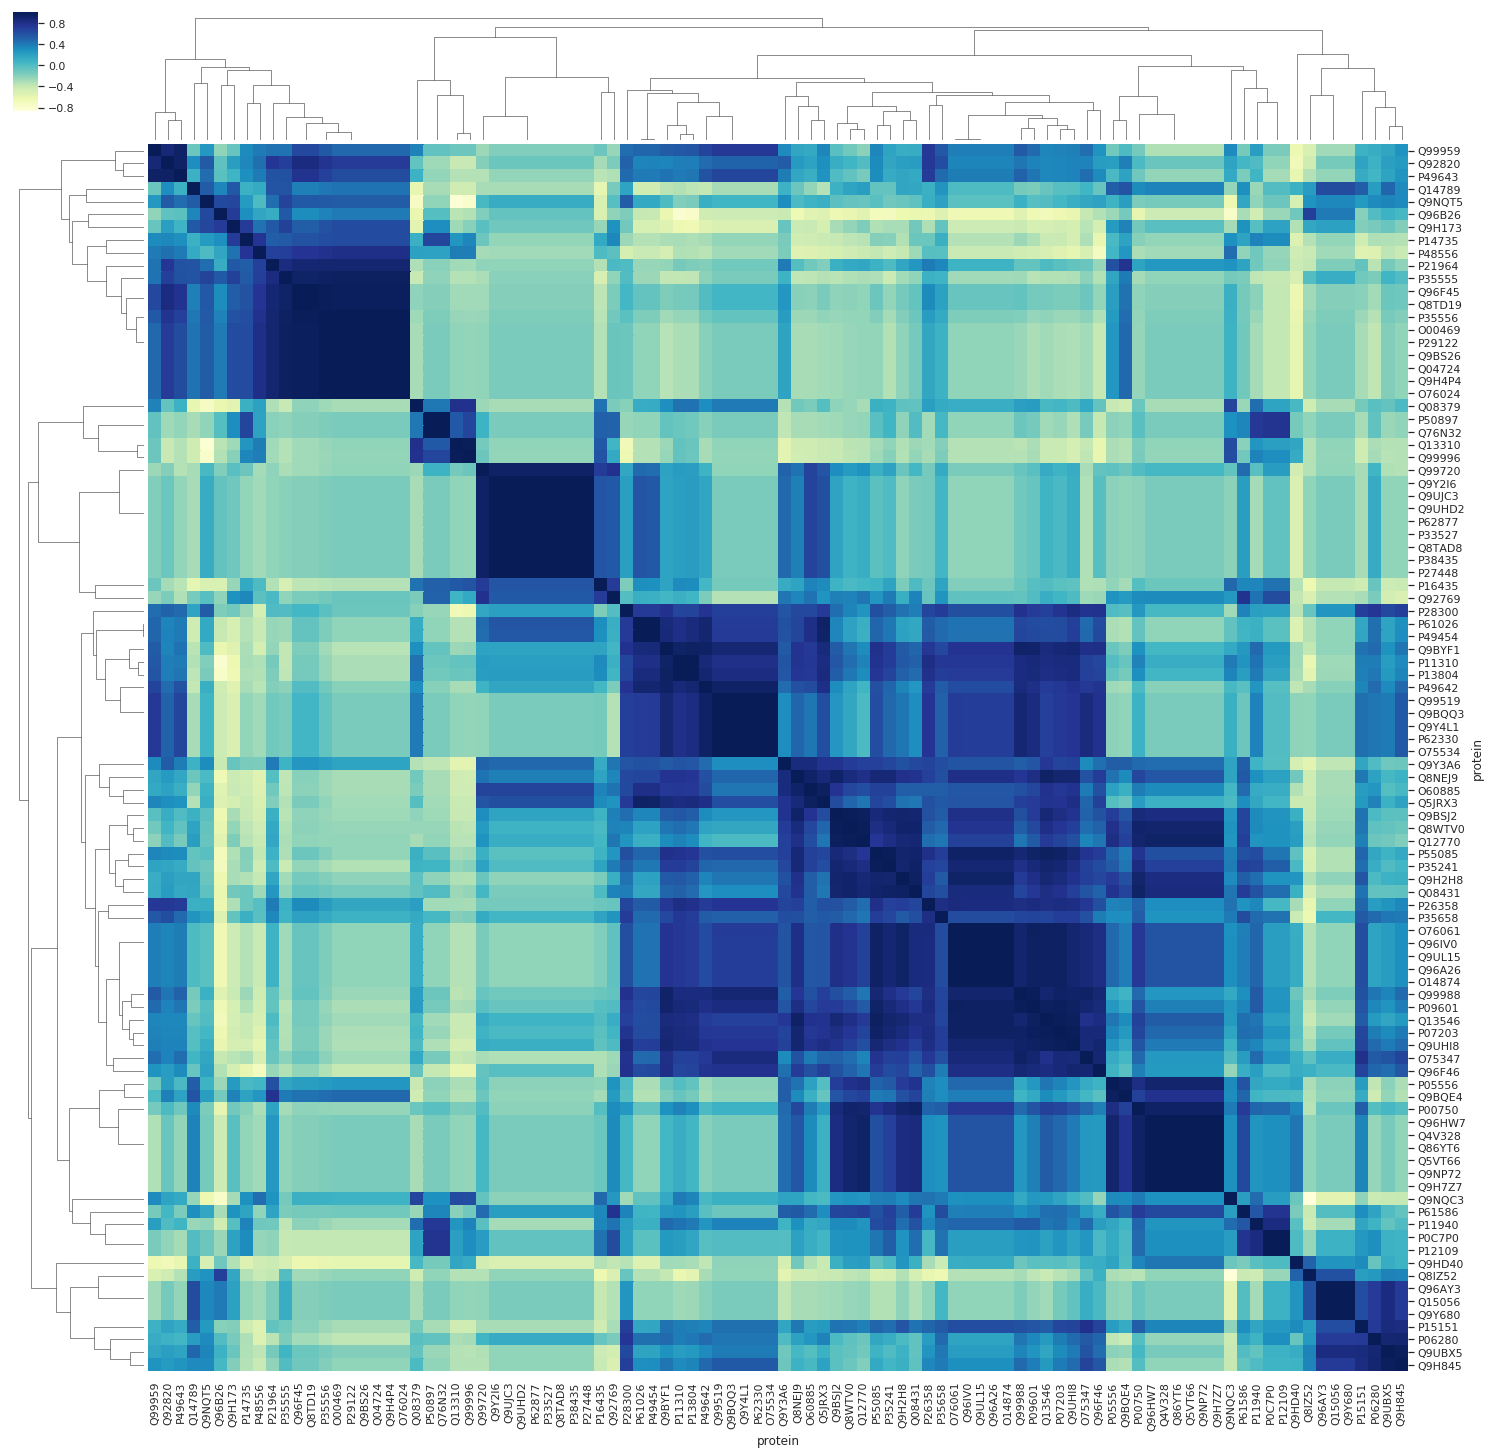

In [6]:
size=(25,25)
g = sns.clustermap(ndf.T.corr(),\
                   figsize=size,\
                   cmap = "YlGnBu",\
                   metric='seuclidean')



g.savefig('plots/cluster.pdf', format='pdf', dpi=300)
g.savefig('plots/cluster.png', format='png', dpi=300)

indx = g.dendrogram_row.reordered_ind

In [7]:
protein_cluster = []
for num in indx:
    for i,ndx in enumerate(ndf.index):
         if num == i:
                protein_cluster.append({'id':i,"protein": ndx,\
                                        'CM' :  list(ndf.loc[ndx,:])[0],\
                                        'ARR':  list(ndf.loc[ndx,:])[1],\
                                        'CHD' : list(ndf.loc[ndx,:])[2],\
                                        'VD' :  list(ndf.loc[ndx,:])[3],\
                                        'IHD' : list(ndf.loc[ndx,:])[4],\
                                        'CCS' : list(ndf.loc[ndx,:])[5],\
                                        'VOO' : list(ndf.loc[ndx,:])[6],\
                                        'OHD' : list(ndf.loc[ndx,:])[7]})
                

In [8]:
protein_cluster_df = pd.DataFrame(protein_cluster)
protein_cluster_df = protein_cluster_df.set_index("protein")

In [9]:
protein_cluster_df = protein_cluster_df.drop(["id"], axis = 1)
protein_cluster_df.head()

,CM,ARR,CHD,VD,IHD,CCS,VOO,OHD
protein,,,,,,,,
Q99959,0.145817,0.043083,0.113005,0.014883,0.008777,0.040622,0.000000,0.028228
Q92820,0.197668,0.043178,0.242166,0.070638,0.080192,0.044248,0.008574,0.078173
P49643,0.009035,0.000000,0.008660,0.000000,0.000000,0.000000,0.000000,0.000000
Q14789,0.000000,0.000000,0.008651,0.011056,0.007815,0.000000,0.000000,0.000000
Q9NQT5,0.025190,0.016837,0.038687,0.032878,0.019390,0.000000,0.024441,0.026885


#### Barplot

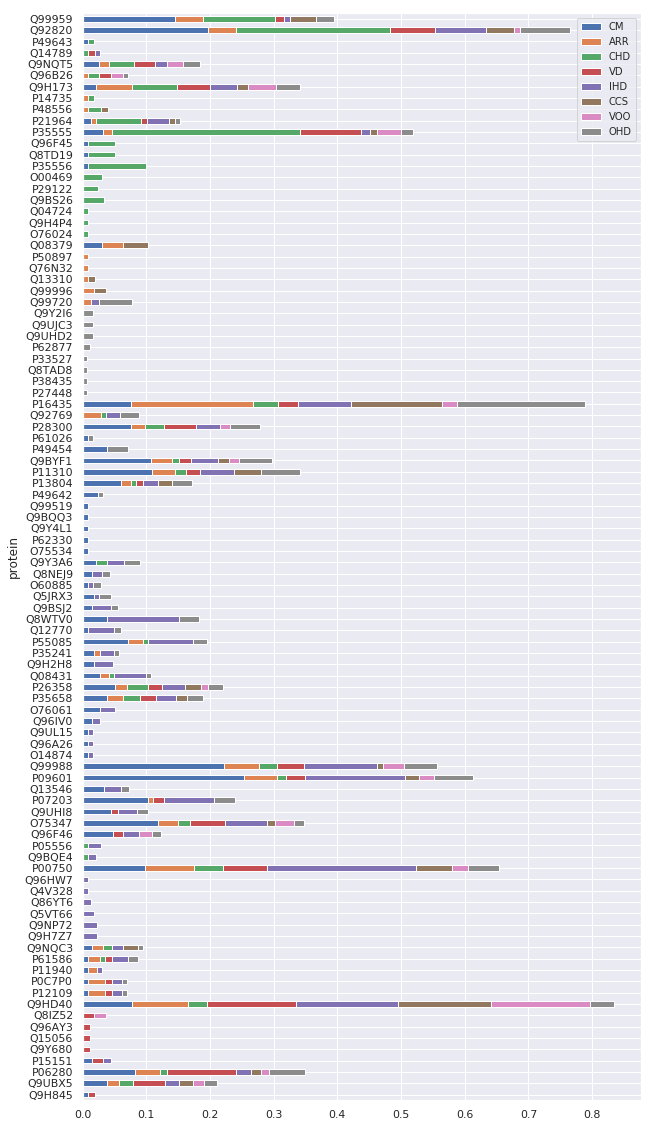

In [10]:
protein_cluster_df.plot.barh(stacked=True,figsize=(10,20))
plt.gca().invert_yaxis()
plt.legend(fontsize =10)
plt.savefig('plots/cluster-bar.pdf')
plt.savefig('plots/cluster-bar.png')

In [11]:
with open("data/id2name.json","r")as f:
    id2name = json.load(f)

names = []
for item in protein_cluster_df.index:
    names.append(id2name[item])

protein_cluster_df['names'] =names
protein_cluster_df.head(1)

,CM,ARR,CHD,VD,IHD,CCS,VOO,OHD,names
protein,,,,,,,,,
Q99959,0.145817,0.043083,0.113005,0.014883,0.008777,0.040622,0.0,0.028228,Plakophilin-2


In [13]:
protein_cluster_df.to_csv("data/protein-cluster-bar-data.csv")